<a href="https://colab.research.google.com/github/Leman5/Reinforcement-Learning/blob/main/Play_Mario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Mario

In [ ]:
!pip install gym_super_mario_bros nes_py

     |████████████████████████████████| 198 kB 22.6 MB/s 
     |████████████████████████████████| 76 kB 2.4 MB/s 
  Created wheel for nes-py: filename=nes_py-8.1.8-cp37-cp37m-linux_x86_64.whl size=437710 sha256=84b4272b2e1dfa4a6028e72d87fff0aed767cc7ef78a5b277f9379e675fc77d3
  Stored in directory: /root/.cache/pip/wheels/f2/05/1f/608f15ab43187096eb5f3087506419c2d9772e97000f3ba025
Successfully built nes-py


In [ ]:
!pip install stable-baselines[mpi]
!pip install stable-baselines3[extra]

     |████████████████████████████████| 240 kB 27.4 MB/s 
     |████████████████████████████████| 2.5 MB 63.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185267 sha256=32cc4c610b3e85f5904489096bc248501480d46b1bf2cdb8073dd0796ed8b9f3
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py
     |████████████████████████████████| 177 kB 30.6 MB/s 
     |████████████████████████████████| 1.5 MB 56.3 MB/s 
     |████████████████████████████████| 1.6 MB 49.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616824 sha256=9da26aa0e1be5b4d4b97fc04152cae502e1cbe303406156b50ff5a80fdd225bd
  Stored in dir

In [ ]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [ ]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [ ]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    # x = env.render()
# Close the game
env.close()

In [ ]:
env.close()

ValueError: ignored

# Preprocess Env

In [ ]:
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu


In [ ]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [ ]:
state = env.reset()

In [ ]:
state.shape

(1, 240, 256, 4)

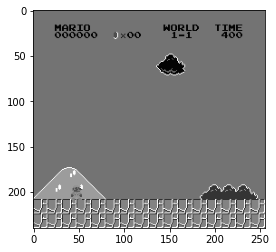

In [ ]:
plt.imshow(state[0])

In [ ]:
state, reward, done, info = env.step([5])

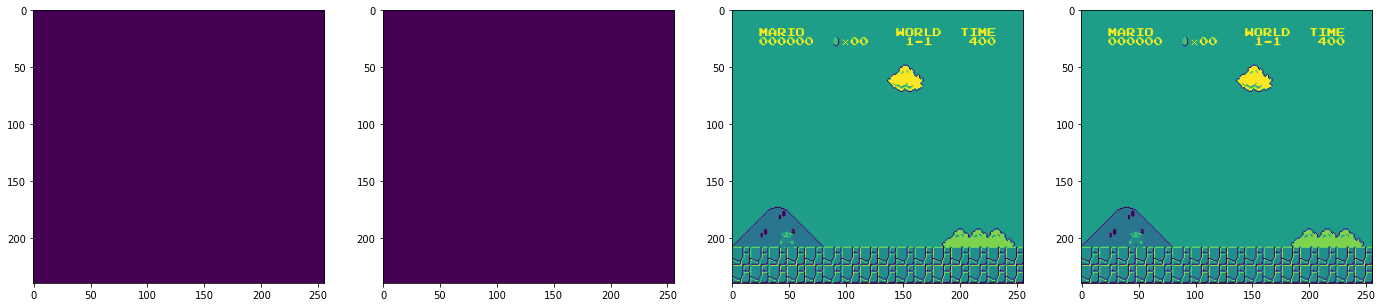

In [ ]:
plt.figure(figsize=(24,18))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

## Train the model

In [ ]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [ ]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [ ]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True


In [ ]:
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [ ]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.00001, 
            n_steps=512) 


Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=100000, callback=callback) 

Logging to ./logs/PPO_1
----------------------------
| time/              |     |
|    fps             | 63  |
|    iterations      | 1   |
|    time_elapsed    | 8   |
|    total_timesteps | 512 |
----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 64           |
|    iterations           | 2            |
|    time_elapsed         | 15           |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0069656363 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 1.91e-05     |
|    learning_rate        | 1e-05        |
|    loss                 | 106          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0063      |
|    value_loss           | 321          |
------------------------------------------

In [ ]:
model = PPO.load('/content/train/best_model_100000')

In [ ]:
model.learn(total_timesteps=100000, callback=callback)

AttributeError: ignored

In [ ]:
state = env.reset()

In [ ]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: ignored